<a href="https://colab.research.google.com/github/Daniel-Sottovia/Trabalho_Vibes/blob/main/trabalho_vibes_06_12_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Vibes

In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np

Definição da Classe Vibes, é possível a entrada de três parâmetros:

*   **n** que é o número de somatórios de a_n e b_n que faremos para cada tempo;
*   **t** que é o período que analisaremos a Resposta do Sistema;
*   **passo** que é o tamanho que tempo aumenta após cada interação;



Caso não informado nenhum parâmetros, **n = 100** e **t = 2** e **passo = 0.005** .


In [25]:
from numpy.lib.function_base import add_newdoc_ufunc
class Vibes():
    '''
    Um automóvel trafega sobre um solo irregular ilustrado na Figura 1.
    Pretendemos determinar a resposta vertical do automóvel durante
    a sua passagem sobre o solo.
    Para tanto, podemos representar o automóvel como um
    sistema de 1GDL sob excitação na base.
    '''
    def __init__(self, n = 100, t = 2, passo = 0.005):
        self.__passo = passo
        self.__periodo = t
        self.__n = n
        '''
        Propriedades m = 1000 kg, k = 196 kN/m e qsi = 0.1, ceq = 5600
        '''
        self.__massa = 1000
        self.__constante_k = 196
        self.__qsi = 0.1
        self.__ceq = 5600
        '''
        Velocidade dos três casos, 2 km/h, 10 km/h e 72 km/h.
        '''
        self.__velocidade1 = 2
        self.__velocidade2 = 10
        self.__velocidade3 = 72
        self.transformar_velocidade()
        '''
        Propriedades Y = 0.1 m e n = 0.2 m e lambda = 0.5 m
        '''
        self.__amplitudeY = 0.1
        self.__comprimento_degrau = 0.2
        self.__lambda = 0.5
        '''
        Obter os ômegas de cada velocidade e o omega_n = 28 rad/s
        '''
        self.__omega_n = 28
        self.omega()
        '''
        Obter razão de frequência de cada caso
        '''
        self.razao_frequencia()
        '''
        Onde irei colocar os dados.
        '''
        self.__tempo = []
        self.__lista1 = []
        self.__lista2 = []
        self.__lista3 = []
        '''
        Dados do deslocamento permanete.
        '''
        self.__tempo1 = []
        self.__lista11 = []
        self.__lista22 = []
        self.__lista33 = []
        '''
        Preencher o banco de dados da posição de cada caso
        '''
        self.deslocamento_carroceria_tempo()
        self.deslocamento_permanente()

    def omega(self):
        tau1 = self.__lambda / self.__velocidade1
        tau2 = self.__lambda / self.__velocidade2
        tau3 = self.__lambda / self.__velocidade3
        self.__omega1 = 2 * math.pi / tau1
        self.__omega2 = 2 * math.pi / tau2
        self.__omega3 = 2 * math.pi / tau3

    def razao_frequencia(self):
        self.__razao1 = self.__omega1 / self.__omega_n
        self.__razao2 = self.__omega2 / self.__omega_n
        self.__razao3 = self.__omega3 / self.__omega_n

    def transformar_velocidade(self):
        '''
        Transformar km/h em m/s
        '''
        self.__velocidade1 = round((self.__velocidade1 / 3.6), 2)
        self.__velocidade2 = round((self.__velocidade2 / 3.6), 2)
        self.__velocidade3 = round((self.__velocidade3 / 3.6), 2)

    def a_0(self):
        a_0 = 2 * (self.__amplitudeY * self.__comprimento_degrau) / self.__lambda
        return a_0

    def a_n(self, n: int):
        a_n = (self.__amplitudeY/(n * math.pi))*math.sin(n * 2 * math.pi * self.__comprimento_degrau / self.__lambda)
        return a_n

    def b_n(self, n: int):
        b_n = - (self.__amplitudeY/(math.pi * n)) * (math.cos((n * 2 * math.pi * self.__comprimento_degrau)/ self.__lambda) - 1)
        return b_n

    def deslocamento_carroceria_tempo(self):
        a_0 = self.a_0()
        t = 0
        while t <= self.__periodo:
            n = 1
            valor1, valor2, valor3 = 0, 0, 0
            while n <= self.__n:
                a_n = self.a_n(n=n)
                b_n = self.b_n(n=n)
                valor1 += a_n * math.cos(n * self.__omega1 * t) + b_n * math.sin(n * self.__omega1 * t)
                valor2 += a_n * math.cos(n * self.__omega2 * t) + b_n * math.sin(n * self.__omega2 * t)
                valor3 += a_n * math.cos(n * self.__omega3 * t) + b_n * math.sin(n * self.__omega3 * t)
                n += 1
            posicao1 = a_0 + valor1
            posicao2 = a_0 + valor2
            posicao3 = a_0 + valor3
            self.__tempo.append(t)
            self.__lista1.append(posicao1)
            self.__lista2.append(posicao2)
            self.__lista3.append(posicao3)
            t += self.__passo

    def a_0_linha(self):
      pass

    def a_n_linha(self, n: int, omega: float):
      a_n_linha = (self.__ceq * self.b_n(n = n) * n * omega) + (self.__constante_k * self.a_n(n = n))
      return a_n_linha

    def b_n_linha(self, n: int, omega: float):
      b_n_linha = (self.__constante_k * self.b_n(n = n)) - (self.__ceq * self.a_n(n = n) * n * omega) 
      return b_n_linha

    def angulo_fase(self, a_n_linha, b_n_linha):
      div = (b_n_linha / a_n_linha)
      angulo_fase = math.atan(div)
      return angulo_fase

    def deslocamento_permanente(self):
      t = 0
      while t <= self.__periodo:
        n = 1
        valor1, valor2, valor3 = 0, 0, 0
        angulo_fase1, angulo_fase2, angulo_fase3 = 0, 0, 0
        while n <= self.__n:
          angulo_fase1 = self.angulo_fase(a_n_linha = self.a_n_linha(n = n, omega = self.__omega1), b_n_linha = self.b_n_linha(n = n, omega = self.__omega1))
          valor1 += (((self.a_n_linha(n = n, omega = self.__omega1) / self.__constante_k)/ ((((1 - (n ** 2) * (self.__razao1 ** 2)) ** 2) + ((2 * self.__qsi * n * self.__razao1) ** 2) )**0.5))* math.cos(n*self.__omega1*t - angulo_fase1) 
                      + ((self.b_n_linha(n = n, omega = self.__omega1) / self.__constante_k)/ ((((1 - (n ** 2) * (self.__razao1 ** 2)) ** 2) + ((2 * self.__qsi * n * self.__razao1) ** 2) )**0.5))* math.sin(n*self.__omega1*t - angulo_fase1))
          
          angulo_fase2 = self.angulo_fase(a_n_linha = self.a_n_linha(n = n, omega = self.__omega2), b_n_linha = self.b_n_linha(n = n, omega = self.__omega2))
          valor2 += (((self.a_n_linha(n = n, omega = self.__omega2) / self.__constante_k)/ ((((1 - (n ** 2) * (self.__razao2 ** 2)) ** 2) + ((2 * self.__qsi * n * self.__razao2) ** 2) )**0.5))* math.cos(n*self.__omega2*t - angulo_fase2) 
                      + ((self.b_n_linha(n = n, omega = self.__omega2) / self.__constante_k)/ ((((1 - (n ** 2) * (self.__razao2 ** 2)) ** 2) + ((2 * self.__qsi * n * self.__razao2) ** 2) )**0.5))* math.sin(n*self.__omega2*t - angulo_fase2))
          
          angulo_fase3 = self.angulo_fase(a_n_linha = self.a_n_linha(n = n, omega = self.__omega3), b_n_linha = self.b_n_linha(n = n, omega = self.__omega3))
          valor3 += (((self.a_n_linha(n = n, omega = self.__omega3) / self.__constante_k)/ ((((1 - (n ** 2) * (self.__razao3 ** 2)) ** 2) + ((2 * self.__qsi * n * self.__razao3) ** 2) )**0.5))* math.cos(n*self.__omega3*t - angulo_fase3) 
                      + ((self.b_n_linha(n = n, omega = self.__omega3) / self.__constante_k)/ ((((1 - (n ** 2) * (self.__razao3 ** 2)) ** 2) + ((2 * self.__qsi * n * self.__razao3) ** 2) )**0.5))* math.sin(n*self.__omega3*t - angulo_fase3))

          n += 1

        posicao1 = valor1
        posicao2 = valor2
        posicao3 = valor3
        self.__tempo1.append(t)
        self.__lista11.append(posicao1)
        self.__lista22.append(posicao2)
        self.__lista33.append(posicao3)
        t += self.__passo
      pass

    def grafico_v1(self):
      plt.figure(figsize=(10,6))
      plt.plot(self.__tempo, self.__lista1, '-b')
      plt.title(" 2 km/h ")
      plt.xlabel("Tempo [s]")
      plt.ylabel("Posição [m]")
      plt.grid(True)
      plt.show()

    def grafico_v11(self):
      plt.figure(figsize=(10,6))
      plt.plot(self.__tempo1, self.__lista11, '-b')
      plt.title(" 2 km/h ")
      plt.xlabel("Tempo [s]")
      plt.ylabel("Deslocamento Permanente [m]")
      plt.grid(True)
      plt.show()

    def grafico_v2(self):
      plt.figure(figsize=(10,6))
      plt.plot(self.__tempo, self.__lista2, '-r')
      plt.title(" 10 km/h ")
      plt.xlabel("Tempo [s]")
      plt.ylabel("Posição [m]")
      plt.grid(True)
      plt.show()

    def grafico_v22(self):
      plt.figure(figsize=(10,6))
      plt.plot(self.__tempo1, self.__lista22, '-r')
      plt.title(" 10 km/h ")
      plt.xlabel("Tempo [s]")
      plt.ylabel("Deslocamento Permanente [m]")
      plt.grid(True)
      plt.show()

    def grafico_v3(self):
      plt.figure(figsize=(10,6))
      plt.plot(self.__tempo, self.__lista3, '-c')
      plt.title(" 72 km/h ")
      plt.xlabel("Tempo [s]")
      plt.ylabel("Posição [m]")
      plt.grid(True)
      plt.show()

    def grafico_v33(self):
      plt.figure(figsize=(10,6))
      plt.plot(self.__tempo1, self.__lista33, '-c')
      plt.title(" 72 km/h ")
      plt.xlabel("Tempo [s]")
      plt.ylabel("Deslocamento Permanente [m]")
      plt.grid(True)
      plt.show()

    def todos_graficos(self):
      plt.figure(figsize=(10, 6))
      plt.plot(self.__tempo, self.__lista1, label='linear')  # Plot some data on the (implicit) axes.
      plt.plot(self.__tempo, self.__lista2, label='quadratic')  # etc.
      plt.plot(self.__tempo, self.__lista3, label='cubic')
      plt.xlabel('Tempo [s]')
      plt.ylabel('Posição [m]')
      plt.title("Resposta do Sistema")
      plt.grid(True)
      plt.show()

    @property
    def tempo(self):
      return self.__tempo

    @property
    def lista1(self):
        return self.__lista1

    @property
    def lista2(self):
        return self.__lista2

    @property
    def lista3(self):
        return self.__lista3

Iniaciaremos a Classe Vibes():

In [33]:
trabalho = Vibes(n=100, t = 0.4, passo = 0.00001)

Para gerar o gráfico no caso da velocidade igual a **2 km/h** ;

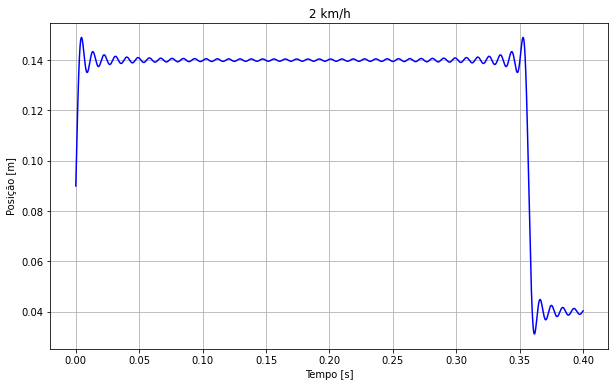

In [34]:
trabalho.grafico_v1()

Para gerar o gráfico no caso da velocidade igual a **10 km/h** ;

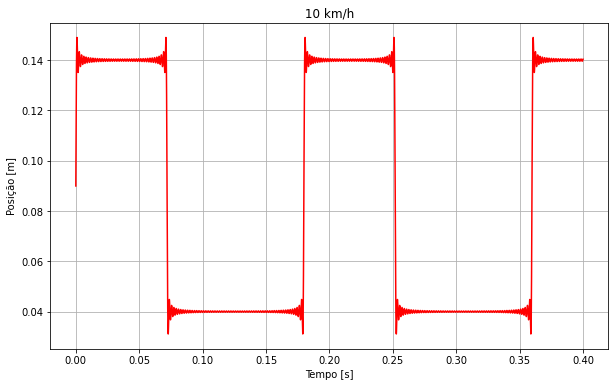

In [35]:
trabalho.grafico_v2()

Para gerar o gráfico no caso da velocidade igual a **10 km/h** ;

*   Analisar os dados gerados, e entender se faz sentido;

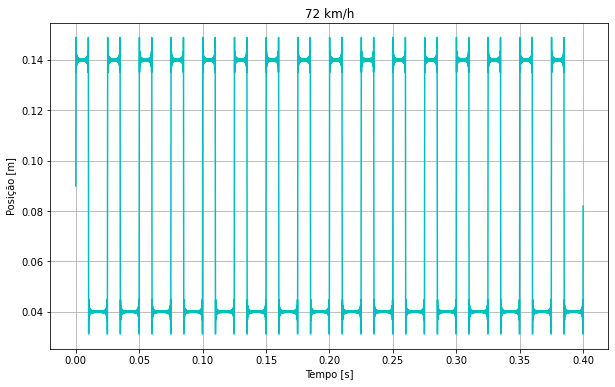

In [36]:
trabalho.grafico_v3()

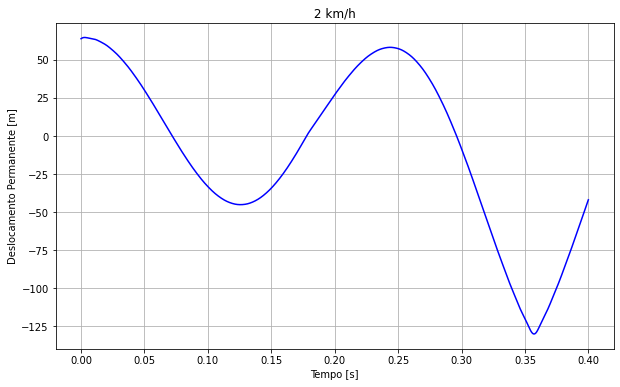

In [37]:
trabalho.grafico_v11()

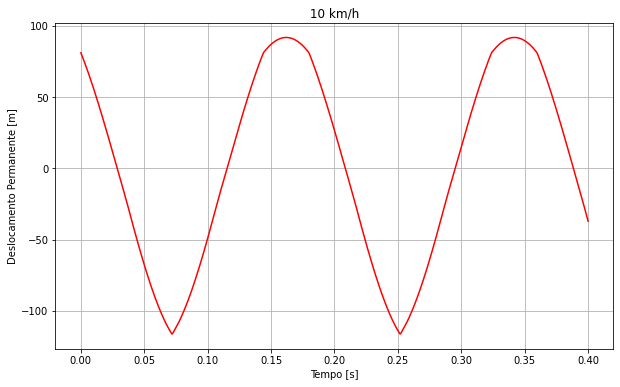

In [38]:
trabalho.grafico_v22()

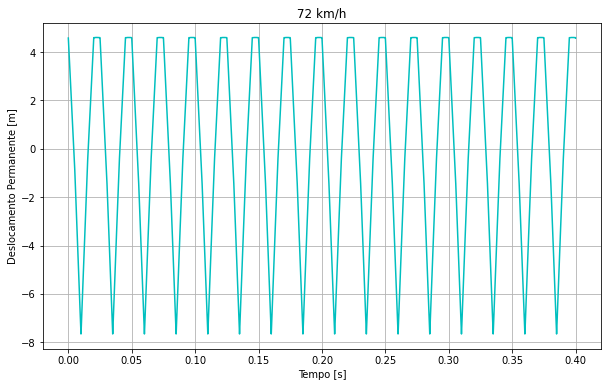

In [39]:
trabalho.grafico_v33()

Para gerar o gráfico da **Resposta do Sistema**, que é a união de todos os casos;

*   Necessário realizar melhor configuração do gráfico;



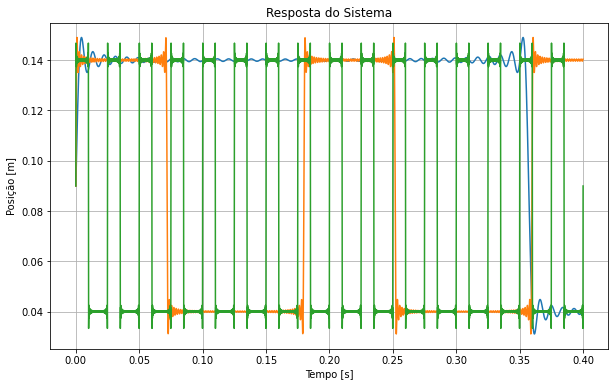

In [13]:
trabalho.todos_graficos()